In [1]:
import os
import grid2op
from grid2op.Parameters import Parameters
import numpy as np
import shutil
from examples.ppo_stable_baselines.C_evaluate_trained_model import load_agent
import matplotlib.pyplot as plt

from sklearn.cluster import AffinityPropagation, KMeans
from tqdm.notebook import tqdm
from grid2op.Runner import Runner
from lightsim2grid import LightSimBackend
from CustomGymEnv import CustomGymEnv

path_agents = "study_rl_agent"

In [2]:
ENV_NAME = "l2rpn_wcci_2022_dev_val"

p = Parameters()
p.LIMIT_INFEASIBLE_CURTAILMENT_STORAGE_ACTION = True

env = grid2op.make(ENV_NAME, backend=LightSimBackend(), param=p)

shutil.rmtree(os.path.abspath(path_agents), ignore_errors=True)
if not os.path.exists(path_agents):
    os.mkdir(path_agents)

# make a runner for this agent
agent_name = "GymEnvWithRecoWithDN_2022-04-23_01-20_learning_rate_1"
gymenv_kwargs = {"safe_max_rho": 0.9}

path_agent = os.path.join(path_agents, agent_name)
shutil.rmtree(os.path.abspath(path_agent), ignore_errors=True)
load_path = os.path.join("saved_model", agent_name)

my_agent = load_agent(env, load_path="saved_model", name=agent_name, gymenv_class=CustomGymEnv, gymenv_kwargs=gymenv_kwargs)

In [3]:
runner = Runner(**env.get_params_for_runner(),
                agentClass=None,
                agentInstance=my_agent
                )
res = runner.run(path_save=path_agent,
                 nb_episode=21,
                 pbar=tqdm)

episode:   0%|          | 0/21 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

The results for the evaluated agent are:
	For chronics with id 2050-01-24_4
		 - cumulative reward: 1252.071045
		 - number of time steps completed: 7 / 2017
	For chronics with id 2050-03-07_0
		 - cumulative reward: 32557.832031
		 - number of time steps completed: 149 / 2017
	For chronics with id 2050-03-14_2
		 - cumulative reward: 143503.406250
		 - number of time steps completed: 708 / 2017
	For chronics with id 2050-03-14_7
		 - cumulative reward: 28499.847656
		 - number of time steps completed: 133 / 2017
	For chronics with id 2050-05-02_3
		 - cumulative reward: 231958.984375
		 - number of time steps completed: 984 / 2017
	For chronics with id 2050-05-09_7
		 - cumulative reward: 304892.406250
		 - number of time steps completed: 1265 / 2017
	For chronics with id 2050-05-30_4
		 - cumulative reward: 122167.429688
		 - number of time steps completed: 463 / 2017
	For chronics with id 2050-06-06_5
		 - cumulative reward: 424674.531250
		 - number of time steps completed: 1552 / 

In [4]:
from grid2op.Episode import EpisodeData
episode_studied = EpisodeData.list_episode(path_agent)
len(episode_studied)

21

In [5]:
this_episode = EpisodeData.from_disk(*episode_studied[20])

In [6]:
curtailment_actions = []
storage_power_actions = []

for ep in episode_studied:
  this_episode = EpisodeData.from_disk(*ep)
  for act in this_episode.actions:
      dict_ = act.as_dict()
      if "storage_power" in dict_:
        storage_power_actions.append(dict_["storage_power"])
      if "curtailment" in dict_:
        curtailment_actions.append(dict_["curtailment"][dict_["curtailment"] >= 0])

curtailment_actions = np.array(curtailment_actions)
storage_power_actions = np.array(storage_power_actions)

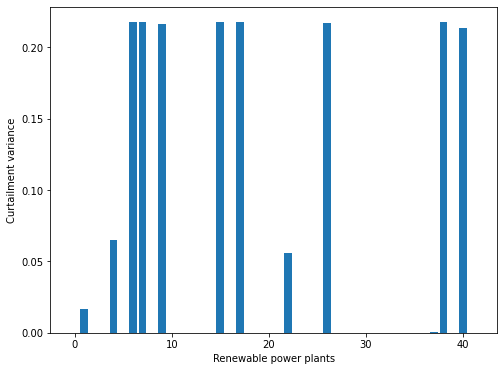

In [7]:
var = np.var(curtailment_actions, axis=0)
mean = np.mean(curtailment_actions, axis=0)

plt.figure(figsize=(8, 6))
plt.bar(np.arange(0, curtailment_actions.shape[1], 1), var)
plt.xlabel("Renewable power plants")
_=plt.ylabel("Curtailment variance")

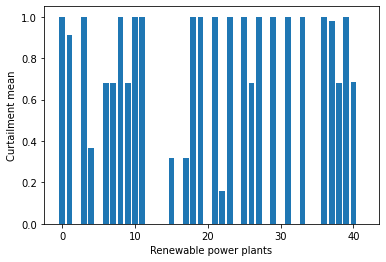

In [8]:
plt.figure(figsize=(8, 6))
plt.bar(np.arange(0, curtailment_actions.shape[1], 1), mean)
plt.xlabel("Renewable power plants")
_=plt.ylabel("Curtailment mean")

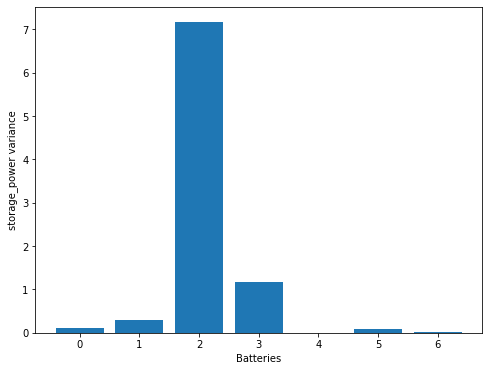

In [9]:
var = np.var(storage_power_actions, axis=0)
mean = np.mean(storage_power_actions, axis=0)

plt.figure(figsize=(8, 6))
plt.bar(np.arange(0, storage_power_actions.shape[1], 1), var)
plt.xlabel("Batteries")
_=plt.ylabel("storage_power variance")

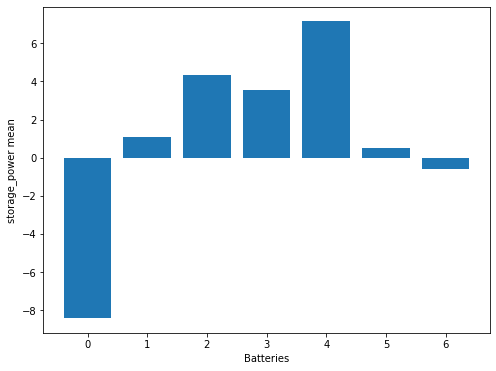

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(np.arange(0, storage_power_actions.shape[1], 1), mean)
plt.xlabel("Batteries")
_=plt.ylabel("storage_power mean")

In [11]:
n_clusters = 10
clustering = KMeans(n_clusters=n_clusters, random_state=42).fit(curtailment_actions)
for i in range(n_clusters):
  print(f"{((clustering.labels_==i).sum() / clustering.labels_.shape[0]) * 100:.4f}% of the data are in the cluster {i}")
  mask = clustering.labels_==i
  mean_dist = ((curtailment_actions[mask] - clustering.cluster_centers_[i])**2).sum(axis=0).mean()
  print(f"The average distance to the cluster center is {mean_dist:.4f}")

64.8569% of the data are in the cluster 0
The average distance to the cluster center is 0.0001232682989211753
30.9970% of the data are in the cluster 1
The average distance to the cluster center is 0.0004292291996534914
0.5923% of the data are in the cluster 2
The average distance to the cluster center is 0.0002448059094604105
2.0731% of the data are in the cluster 3
The average distance to the cluster center is 7.669139449717477e-05
0.1974% of the data are in the cluster 4
The average distance to the cluster center is 0.0002752730215433985
0.0987% of the data are in the cluster 5
The average distance to the cluster center is 0.0
0.2962% of the data are in the cluster 6
The average distance to the cluster center is 4.642151543521322e-05
0.0987% of the data are in the cluster 7
The average distance to the cluster center is 1.6521176010920818e-18
0.6910% of the data are in the cluster 8
The average distance to the cluster center is 0.00010171866597374901
0.0987% of the data are in the cl

In [12]:
n_clusters = 10
clustering = KMeans(n_clusters=n_clusters, random_state=42).fit(storage_power_actions)
for i in range(n_clusters):
  print(f"{((clustering.labels_==i).sum() / clustering.labels_.shape[0]) * 100:.4f}% of the data are in the cluster {i}")
  mask = clustering.labels_==i
  mean_dist = ((storage_power_actions[mask] - clustering.cluster_centers_[i])**2).sum(axis=0).mean()
  print(f"The average distance to the cluster center is {mean_dist:.4f}")

64.8569% of the data are in the cluster 0
The average distance to the cluster center is 0.001447424991056323
30.9970% of the data are in the cluster 1
The average distance to the cluster center is 0.003951460123062134
0.0987% of the data are in the cluster 2
The average distance to the cluster center is 0.0
2.0731% of the data are in the cluster 3
The average distance to the cluster center is 0.0011830503353849053
0.1974% of the data are in the cluster 4
The average distance to the cluster center is 0.001891941879875958
0.5923% of the data are in the cluster 5
The average distance to the cluster center is 0.0027112674433737993
0.0987% of the data are in the cluster 6
The average distance to the cluster center is 0.0
0.3949% of the data are in the cluster 7
The average distance to the cluster center is 0.0018688504351302981
0.0987% of the data are in the cluster 8
The average distance to the cluster center is 6.344131720542492e-16
0.5923% of the data are in the cluster 9
The average dis